# Nerural Network
<p>
선형회귀
</p>

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42

In [2]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.15.0
2.15.0


In [3]:
!pip install ipython-autotime

In [4]:
%load_ext autotime

time: 436 µs (started: 2024-06-28 03:05:23 +00:00)


## 데이터 준비

In [5]:
X_train = np.array([1,2,3,4,5,6])
y_train = np.array([9,12,15,18,21,24])

time: 768 µs (started: 2024-06-28 03:05:23 +00:00)


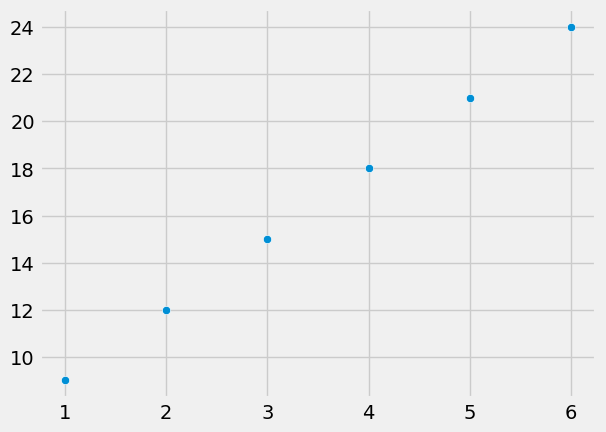

time: 771 ms (started: 2024-06-28 03:05:24 +00:00)


In [6]:
sns.scatterplot(x=X_train,y=y_train)
plt.show()

## LinearRegression

In [7]:
X_train = X_train.reshape(-1,1)

time: 662 µs (started: 2024-06-28 03:05:24 +00:00)


In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

time: 232 ms (started: 2024-06-28 03:05:24 +00:00)


In [9]:
lr.coef_, lr.intercept_ # intercept_ = y절편

(array([3.]), 5.999999999999998)

time: 6.47 ms (started: 2024-06-28 03:05:25 +00:00)


In [19]:
lr.predict([[10]])

array([36.])

time: 16.5 ms (started: 2024-06-28 03:22:54 +00:00)


## NN model

In [10]:
from keras import layers

model = keras.Sequential(
    layers.Dense(units=1, input_shape=(1,))
)

time: 274 ms (started: 2024-06-28 03:11:56 +00:00)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 60.6 ms (started: 2024-06-28 03:12:01 +00:00)


In [36]:
model.compile(
    loss = 'mse',
    optimizer = 'adam',
    metrics = ['mse']
)

time: 86.4 ms (started: 2024-06-28 03:27:22 +00:00)


In [37]:
history = model.fit(X_train, y_train, epochs=100, batch_size=len(X_train))

Epoch 1/100
1/1 [==============================] - 0s 392ms/step - loss: 15.4674 - mae: 15.4674
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 15.4629 - mae: 15.4629
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 15.4584 - mae: 15.4584
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 15.4539 - mae: 15.4539
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 15.4494 - mae: 15.4494
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 15.4449 - mae: 15.4449
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 15.4404 - mae: 15.4404
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 15.4359 - mae: 15.4359
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 15.4314 - mae: 15.4314
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 15.4269 - mae: 15.4269
Epoch 11/100
1/1 [==============================

In [38]:
model.get_weights()

[array([[0.09289169]], dtype=float32), array([1.1575133], dtype=float32)]

time: 9.83 ms (started: 2024-06-28 03:27:25 +00:00)


In [39]:
y_pred = model.predict([[10]])
y_pred

1/1 [==============================] - 0s 145ms/step


array([[2.08643]], dtype=float32)

time: 302 ms (started: 2024-06-28 03:27:25 +00:00)


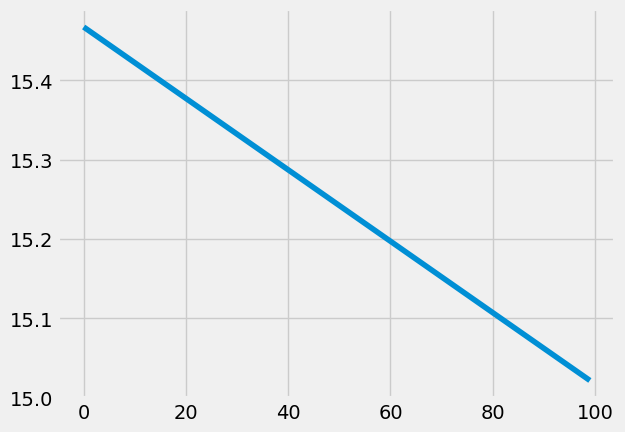

time: 352 ms (started: 2024-06-28 03:28:55 +00:00)


In [46]:
plt.figsize=(3,3)
sns.lineplot(history.history['loss'])
plt.show()